In [2]:
import pandas as pd

#Load the dataset
df = pd.read_csv('spam.csv',encoding='latin-1')

#Inspect the first few rows
print(df.head())

#check dataset information
print(df.info())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [3]:
#Renaming columns for clarity
df = df.rename(columns={'v1':'label', 'v2': 'message'})

#Droping unused columns
df = df[['label','message']]
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
#Data Exploration
#Missing values
print(df.isnull().sum())

label      0
message    0
dtype: int64


In [5]:
#check for duplicates
print(df.duplicated().sum())

403


In [6]:
#Removing duplicates
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [7]:
#Label Encoding

#encode labels as 0(ham) and 1 (spam)
df['label']=df['label'].map({'ham':0, 'spam':1})

#confirming encoding
print(df['label'].value_counts())

label
0    4516
1     653
Name: count, dtype: int64


In [8]:
#checking updated dataset
print(df.head())
print(df.info())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB
None


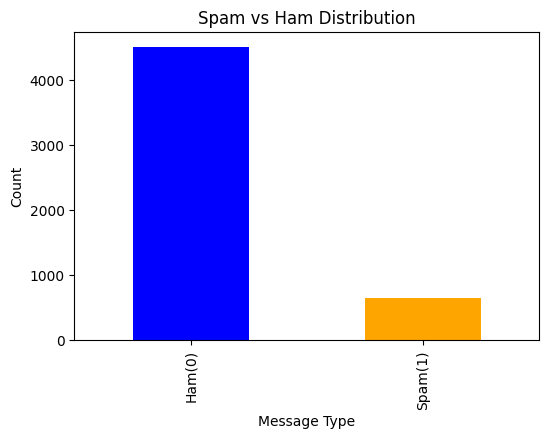

In [9]:
#Visualize the Data

import matplotlib.pyplot as plt

#plot the distribution of spam vs Ham
df['label'].value_counts().plot(kind='bar', color=['blue','orange'],figsize=(6,4))
plt.title('Spam vs Ham Distribution')
plt.xticks(ticks=[0,1],labels=['Ham(0)', 'Spam(1)']) #Specifies the position of the ticks.
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [10]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [11]:
import nltk
import os

# Set NLTK data path
nltk_data_path = 'D:\\MachineLearning\\SpamSMSDetection\\nltk_data'
os.environ['NLTK_DATA'] = nltk_data_path

# Add the path to nltk.data.path
nltk.data.path.append(nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('punkt_tab', download_dir=nltk_data_path)
print(nltk.data.path)  # Verify the updated path


['C:\\Users\\jerus_7625x1r/nltk_data', 'C:\\Users\\jerus_7625x1r\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'C:\\Users\\jerus_7625x1r\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'C:\\Users\\jerus_7625x1r\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\jerus_7625x1r\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'D:\\MachineLearning\\SpamSMSDetection\\nltk_data']


[nltk_data] Downloading package stopwords to
[nltk_data]     D:\MachineLearning\SpamSMSDetection\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     D:\MachineLearning\SpamSMSDetection\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     D:\MachineLearning\SpamSMSDetection\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [12]:
#Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [13]:
def preprocess_text(text):

    #convert to lowercase
    text = text.lower()
    #remove punctuations
    text = text.translate(str.maketrans('','',string.punctuation))
    #tokenization
    tokens = word_tokenize(text)
    #Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    #Join tokens back into a single string
    return ' '.join(filtered_tokens)

# Apply the function to the 'message' column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Preview the first few rows
print(df[['message', 'cleaned_message']].head())

                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [14]:
#convert text into Numerical Features(TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# Apply the vectorizer to the 'cleaned_message' column
X = vectorizer.fit_transform(df['cleaned_message']).toarray()
# Check the shape of the resulting matrix (number of messages and features)
print(X.shape)

(5169, 5000)


In [15]:
#Split the Data into Training and Test Sets
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (4135, 5000)
Test data shape: (1034, 5000)


In [16]:
#Train a Machine Learning Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Check the accuracy on the training data
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9640


In [17]:
#Evaluate the Model
# Evaluate the model on the test data
test_accuracy = model.score(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9468


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_test_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

Random Forest Test Accuracy: 0.9700


In [19]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_test_accuracy = svm_model.score(X_test, y_test)
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")

SVM Test Accuracy: 0.9778


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees in the forest
    'max_depth': [10, 20, None],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples required at each leaf node
    'bootstrap': [True, False]          # Whether to use bootstrap samples
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9763002856097387


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Use the best estimator from Grid Search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Confusion Matrix:
 [[888   1]
 [ 21 124]]


In [22]:
from sklearn.preprocessing import Binarizer

# Get probabilities instead of direct predictions
y_probs = best_model.predict_proba(X_test)[:, 1]

# Adjust threshold to classify as spam if probability > 0.4 instead of 0.5
threshold = 0.4
y_pred_adjusted = (y_probs > threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.96      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [23]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

In [24]:
# Fit the vectorizer on the training data
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(df['cleaned_message']).toarray()

In [25]:
# Example messages to classify
new_messages = [
    "Congratulations! You've won a $1000 gift card. Call now to claim your prize.",
    "Hey, can you send me the notes from yesterday's meeting?",
    "Get cheap loans now! Limited time offer. Apply today!",
    "Let's catch up for lunch tomorrow at 1 PM.",
    "You have been selected for a free vacation. Click here to claim."
]

# Preprocess the messages
new_messages_cleaned = [preprocess_text(msg) for msg in new_messages]

# Transform the preprocessed messages into TF-IDF features
new_messages_features = vectorizer.transform(new_messages_cleaned).toarray()

# Predict with the best model
predictions = best_model.predict(new_messages_features)

# Display predictions
for msg, pred in zip(new_messages, predictions):
    print(f"Message: {msg}")
    print(f"Prediction: {'Spam' if pred == 1 else 'Ham'}\n")


Message: Congratulations! You've won a $1000 gift card. Call now to claim your prize.
Prediction: Spam

Message: Hey, can you send me the notes from yesterday's meeting?
Prediction: Ham

Message: Get cheap loans now! Limited time offer. Apply today!
Prediction: Ham

Message: Let's catch up for lunch tomorrow at 1 PM.
Prediction: Ham

Message: You have been selected for a free vacation. Click here to claim.
Prediction: Spam



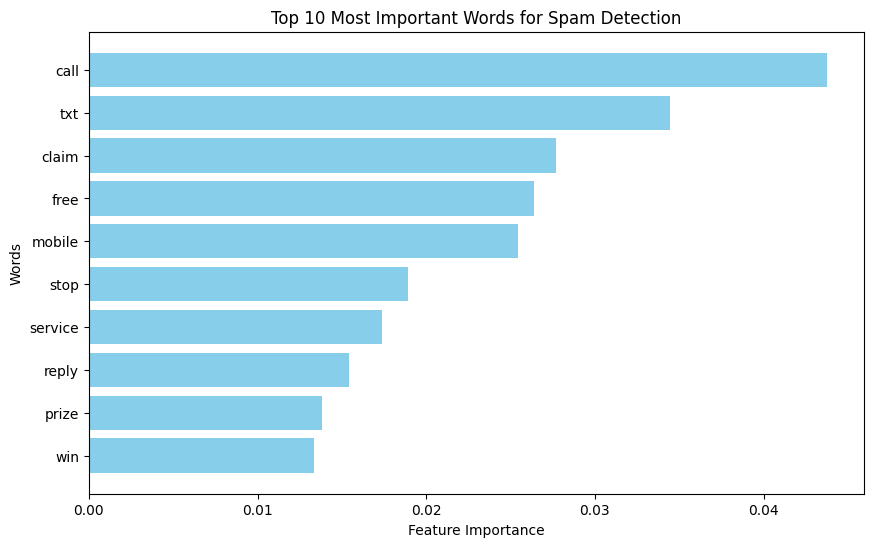

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
importances = best_model.feature_importances_

# Get the indices of the top 10 important features
indices = np.argsort(importances)[-10:]

# Get the corresponding words from the TF-IDF vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# Plot the top 10 important words
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Words')
plt.title('Top 10 Most Important Words for Spam Detection')
plt.show()

In [27]:
import pickle

# Save the trained Random Forest model to a .pkl file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the TF-IDF vectorizer to a .pkl file
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!
